In [ ]:
# Thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Chia mảng hoặc ma trận trận thành các tập con
from sklearn.tree import DecisionTreeClassifier # Bộ phận loại cây quyết định
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier # Bộ phận loại  RandomForest
from sklearn.naive_bayes import GaussianNB # Thuật toán phân lớp Naive Bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
# @title Văn bản tiêu đề mặc định
from google.colab import files

# Chọn tệp tin từ máy tính
uploaded = files.upload()

Saving test_mSzZ8RL.csv to test_mSzZ8RL.csv
Saving train_s3TEQDk.csv to train_s3TEQDk.csv


In [ ]:
# Đọc dữ liệu
data = pd.read_csv('train_s3TEQDk.csv')

In [ ]:
# Hiển thị thông tin cơ bản về dữ liệu trong DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
# Trả về thông tin chứa số lượng dòng và cột của DataFrame
data.shape

(245725, 11)

In [ ]:
# Tạo một bản sao độc lập của DataFrame
df = data.copy()

In [ ]:
# Hiển thị một số dòng đầu tiên của DataFrame
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
# Thống kê mô tả dữ liệu
df.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,NNVBBKZB,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [ ]:
# Giá trị duy nhất
df.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [ ]:
# Kiểm giá trị bị thiếu
df.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
# Xóa giá trị bị thiếu
df.dropna(axis='index',how='any',inplace=True)

In [ ]:
# Kiểm giá trị bị thiếu
df.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [ ]:
# Kiểm tra giá trị trùng lặp
print("Dữ liệu trùng lặp:", df.duplicated().sum())

Dữ liệu trùng lặp: 0


In [ ]:
# Xóa dữ liệu bị trùng lặp
# df.drop_duplicates(inplace=True)

In [ ]:
# Loại bỏ khoảng trang
for i in df.columns:
  if df[i].dtype == 'oject':
    df[i] = df[i].str.strip()

In [ ]:
# Kiểm tra class
df.Is_Active.value_counts()

No     134866
Yes     81534
Name: Is_Active, dtype: int64

In [ ]:
# Xóa cột thuộc tính
df=df.drop("ID", axis=1)

<Axes: xlabel='Is_Lead'>

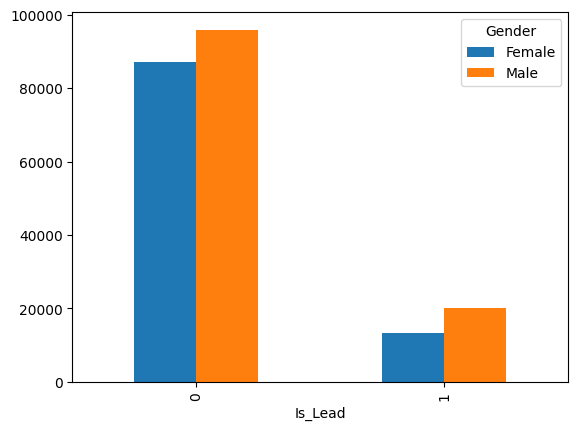

In [ ]:
# Tạo 1 bảng phân tích chéo (crosstab) giữa hai cột
class_sex = pd.crosstab(df['Is_Lead'],df['Gender'])
# Tạo biểu đồ từ bảng phân tích chéo
class_sex.plot(kind = 'bar')

<Axes: xlabel='Is_Lead'>

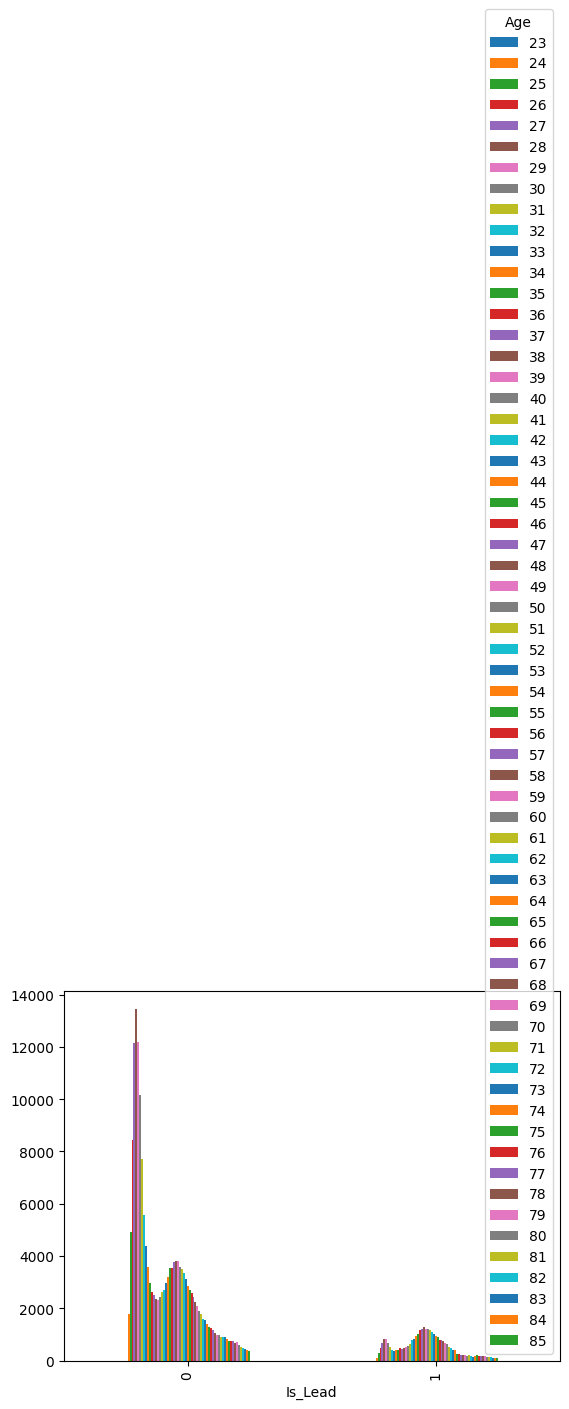

In [ ]:
class_sex = pd.crosstab(df['Is_Lead'],df['Age'])
class_sex.plot(kind = 'bar')

<Axes: xlabel='Is_Lead'>

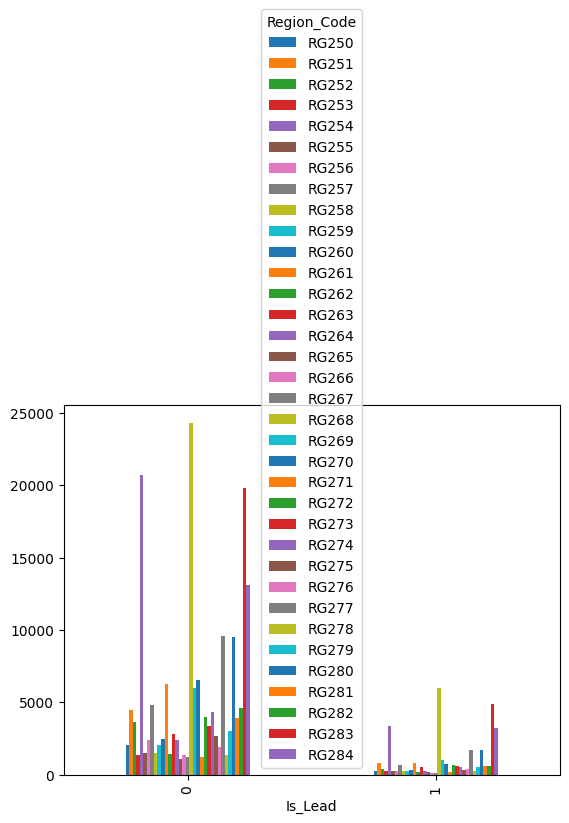

In [ ]:
class_sex = pd.crosstab(df['Is_Lead'],df['Region_Code'])
class_sex.plot(kind = 'bar')

<Axes: xlabel='Is_Lead'>

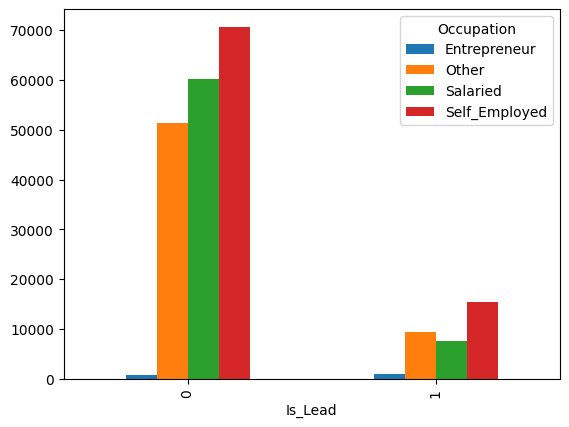

In [ ]:
class_sex = pd.crosstab(df['Is_Lead'],df['Occupation'])
class_sex.plot(kind = 'bar')

<Axes: xlabel='Is_Lead'>

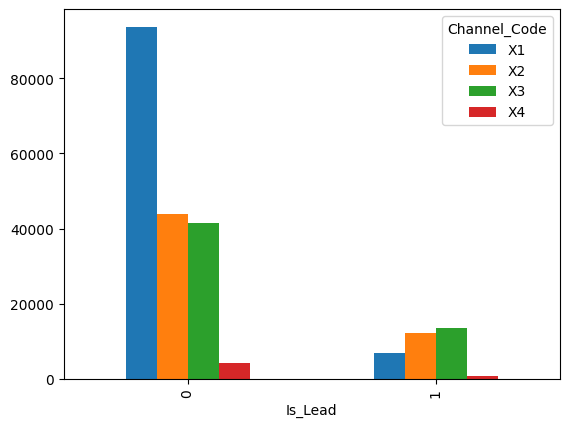

In [ ]:
class_sex = pd.crosstab(df['Is_Lead'],df['Channel_Code'])
class_sex.plot(kind = 'bar')

<Axes: xlabel='Is_Lead'>

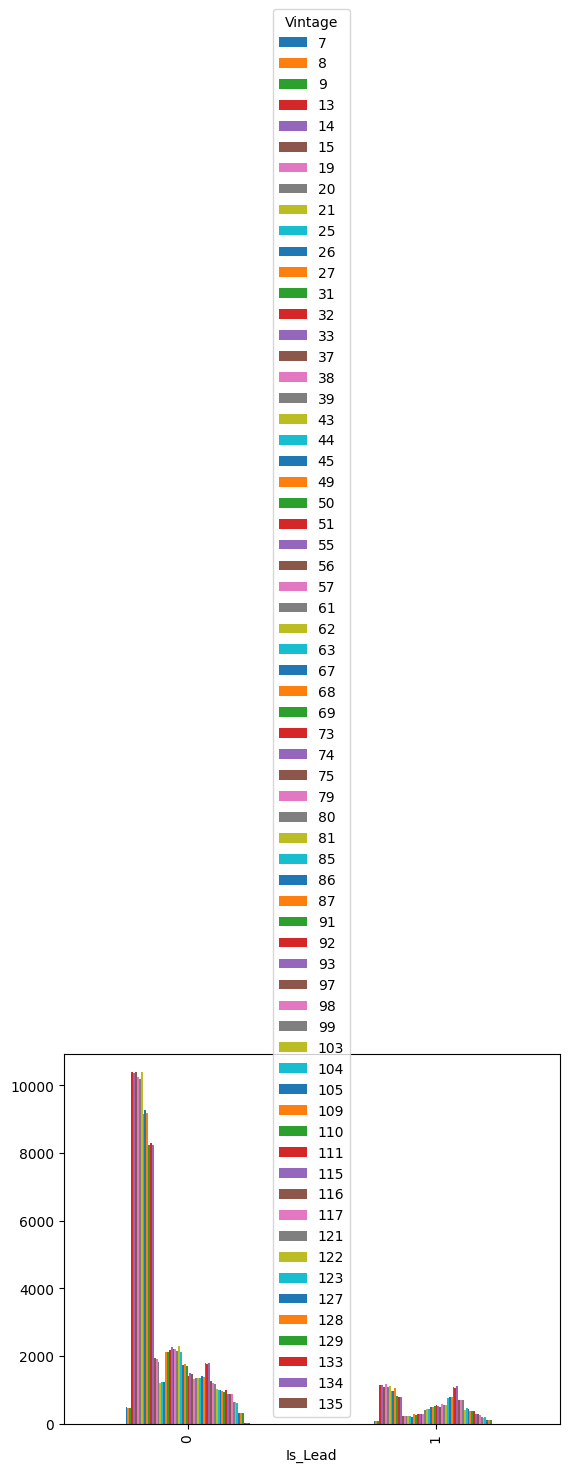

In [ ]:
class_sex = pd.crosstab(df['Is_Lead'],df['Vintage'])
class_sex.plot(kind = 'bar')

<Axes: xlabel='Is_Lead'>

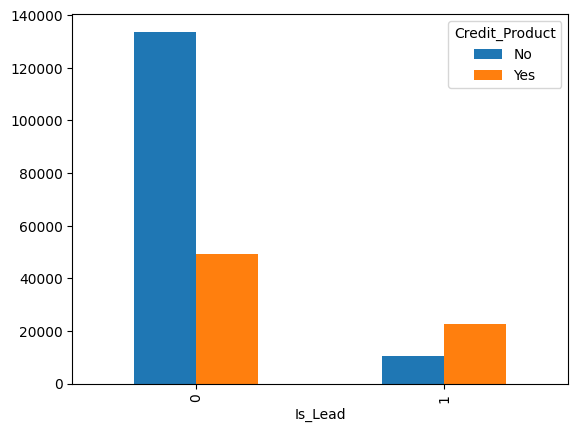

In [ ]:
# Tạo 1 bảng phân tích chéo (crosstab) giữa hai cột
class_sex = pd.crosstab(df['Is_Lead'],df['Credit_Product'])
class_sex.plot(kind = 'bar')

<Axes: xlabel='Is_Lead'>

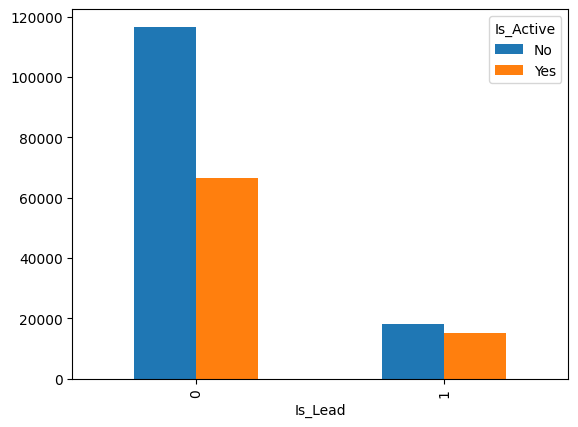

In [ ]:
class_sex = pd.crosstab(df['Is_Lead'],df['Is_Active'])
class_sex.plot(kind = 'bar')

Text(0.5, 1.0, 'Is_Lead Distribution')

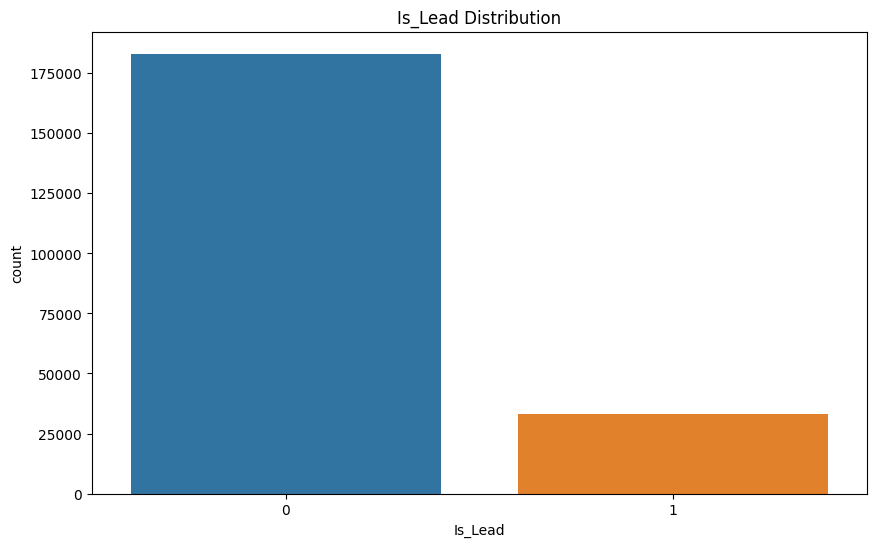

In [ ]:
# Tạo hình vẽ mới
plt.figure(figsize=(10,6))
# Tạo biểu đồ đếm
sns.countplot(x = "Is_Lead", data=df)
# Đặt tiêu đề cho biểu đồ
plt.title("Is_Lead Distribution")
# Hiện thị

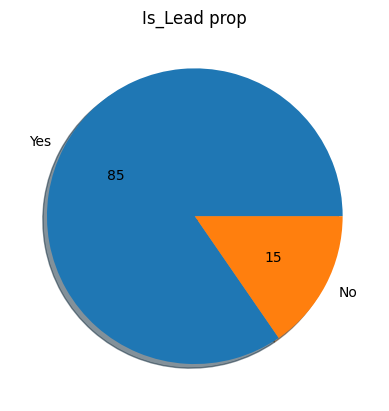

In [ ]:
# Tạo biểu đồ tròn
plt.pie(df.Is_Lead.value_counts(),
        labels = ['Yes','No'], autopct='%.f',shadow=True)
plt.title('Is_Lead prop')
plt.show()

<ipython-input-29-6c89d15408fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-29-6c89d15408fe>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, fmt = '.2f')


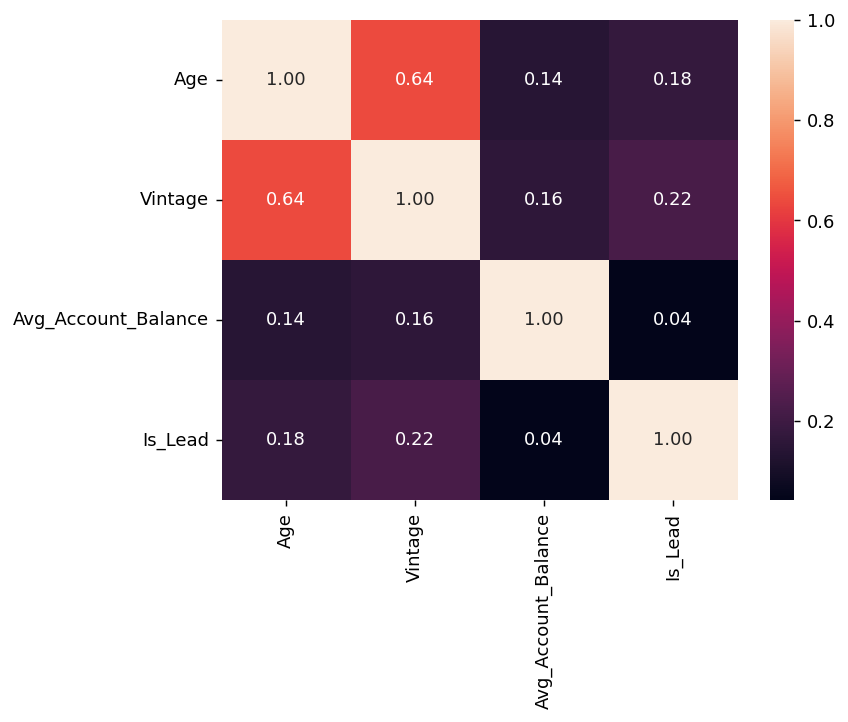

In [ ]:
# tính toán ma trận tương quan giữa các cột
corr = df.corr()
# Tạo hình vẽ mới với độ phân giải
plt.figure(dpi=130)
# Tạo một biểu đồ có tên heatmap
sns.heatmap(df.corr(),annot = True, fmt = '.2f')
plt.show()

In [ ]:
# Biến đổi dữ liệu object sang int
df['Gender'] = df['Gender'].replace('Female',0)
df['Gender'] = df['Gender'].replace('Male',1)

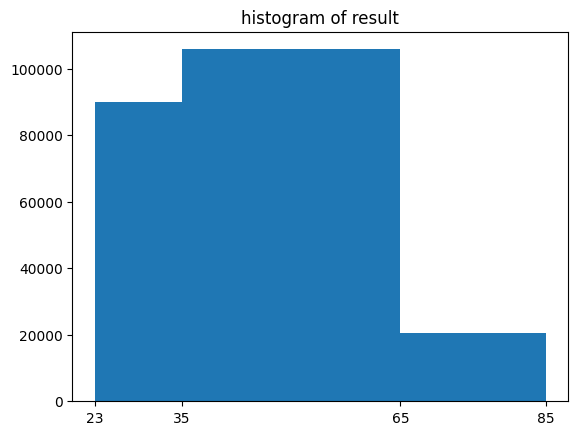

In [ ]:
# Taho hình vẽ
fig,ax = plt.subplots(1,1)
# Gán
a=df['Age']
# Tạo biểu đồ
ax.hist(a, bins = [23,35,65,85])
# Đặt tiêu đề
ax.set_title("histogram of result")
# Đặt các điểm chia trên trục x
ax.set_xticks([23,35,65,85])
# Hiển thị biểu đồ
plt.show()

In [ ]:
def categorize_target(value):
    if value < 1000000:
        return "1000000$<"
    elif value >= 1000000:
        return ">1000000$"

df['Avg_Account_Balance'] = df['Avg_Account_Balance'].apply(categorize_target)

In [ ]:
# Biến đổi kiểu object sang kiểu int
df['Avg_Account_Balance'] = df['Avg_Account_Balance'].replace('1000000$<',0)
df['Avg_Account_Balance'] = df['Avg_Account_Balance'].replace('>1000000$',1)

# Hiện thị
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,RG268,Other,X3,43,No,1,No,0
1,0,30,RG277,Salaried,X1,32,No,0,No,0
2,0,56,RG268,Self_Employed,X3,26,No,1,Yes,0
3,1,34,RG270,Salaried,X1,19,No,0,No,0
4,0,30,RG282,Salaried,X1,33,No,0,No,0


In [ ]:
bins = [23,35,65,85]  # Giả định các khoảng tuổi là: 23-35,36-65,66-85
labels = ['Người trẻ', 'Người trung niên', 'Người già']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Hiển thị kết quả
print(df[['Age', 'Age']])

                     Age               Age
0              Người già         Người già
1              Người trẻ         Người trẻ
2       Người trung niên  Người trung niên
3              Người trẻ         Người trẻ
4              Người trẻ         Người trẻ
...                  ...               ...
245719  Người trung niên  Người trung niên
245721         Người trẻ         Người trẻ
245722         Người trẻ         Người trẻ
245723         Người trẻ         Người trẻ
245724         Người trẻ         Người trẻ

[216400 rows x 2 columns]


In [ ]:
# Biến đổi kiểu object sang kiểu int
df['Age'] = df['Age'].replace('Người trẻ',0)
df['Age'] = df['Age'].replace('Người trung niên',1)
df['Age'] = df['Age'].replace('Người già',2)

# Hiện thị
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,2,RG268,Other,X3,43,No,1,No,0
1,0,0,RG277,Salaried,X1,32,No,0,No,0
2,0,1,RG268,Self_Employed,X3,26,No,1,Yes,0
3,1,0,RG270,Salaried,X1,19,No,0,No,0
4,0,0,RG282,Salaried,X1,33,No,0,No,0


In [ ]:
# Định nghĩa danh sách
categorical_columns = ["Gender","Region_Code","Occupation","Channel_Code","Credit_Product","Is_Active"]
# Tạo ra các biến
df = pd.concat([df, pd.get_dummies(df[categorical_columns])], axis=1)
# Trả về danh sách
df.columns
# Loại bỏ các cột
df.drop(columns=categorical_columns, inplace=True)
# Hiện thị
df.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,2,43,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,32,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,1,26,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,0,19,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,0,33,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [ ]:
# Hiện thị tổng quan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216400 entries, 0 to 245724
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Age                       215919 non-null  category
 1   Vintage                   216400 non-null  int64   
 2   Avg_Account_Balance       216400 non-null  int64   
 3   Is_Lead                   216400 non-null  int64   
 4   Region_Code_RG250         216400 non-null  uint8   
 5   Region_Code_RG251         216400 non-null  uint8   
 6   Region_Code_RG252         216400 non-null  uint8   
 7   Region_Code_RG253         216400 non-null  uint8   
 8   Region_Code_RG254         216400 non-null  uint8   
 9   Region_Code_RG255         216400 non-null  uint8   
 10  Region_Code_RG256         216400 non-null  uint8   
 11  Region_Code_RG257         216400 non-null  uint8   
 12  Region_Code_RG258         216400 non-null  uint8   
 13  Region_Code_RG259         216

In [ ]:
# Tạo
x = df.drop(['Is_Lead'], axis=1)
y = df['Is_Lead']
# Chia data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# x_train = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]  # Dữ liệu huấn luyện của các đặc trưng
# y_train = [0, 1, 0]  # Nhãn của dữ liệu huấn luyện

# x_test = [[10, 11, 12], [13, 14, 15]]  # Dữ liệu kiểm tra của các đặc trưng
# y_test = [0, 1]  # Nhãn của dữ liệu kiểm tra
best_max_depth = None
best_accuracy = 0.0

max_depth_list = range(1, 31)
for max_depth in max_depth_list:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(x_train, y_train)

    dt_predictions = dt_model.predict(x_test)
    dt_accuracy = accuracy_score(y_test, dt_predictions)

    print(f'max_depth: {max_depth}, Accuracy: {dt_accuracy}')

    if dt_accuracy > best_accuracy:
        best_accuracy = dt_accuracy
        best_max_depth = max_depth

print(f'Max depth phù hợp là: {best_max_depth}')

max_depth: 1, Accuracy: 0.8470887245841036
max_depth: 2, Accuracy: 0.8470887245841036
max_depth: 3, Accuracy: 0.8551293900184843
max_depth: 4, Accuracy: 0.8568545902649415
max_depth: 5, Accuracy: 0.858086876155268
max_depth: 6, Accuracy: 0.8591805298829328
max_depth: 7, Accuracy: 0.8600123228589033
max_depth: 8, Accuracy: 0.8597196549599507
max_depth: 9, Accuracy: 0.8589648798521257
max_depth: 10, Accuracy: 0.8588108441158349
max_depth: 11, Accuracy: 0.8570240295748613
max_depth: 12, Accuracy: 0.8563616759088108
max_depth: 13, Accuracy: 0.8565465187923599
max_depth: 14, Accuracy: 0.8552680221811461
max_depth: 15, Accuracy: 0.8544208256315465
max_depth: 16, Accuracy: 0.8538817005545286
max_depth: 17, Accuracy: 0.8526648182378311
max_depth: 18, Accuracy: 0.8522335181762168
max_depth: 19, Accuracy: 0.85150955021565
max_depth: 20, Accuracy: 0.8497227356746765
max_depth: 21, Accuracy: 0.8489679605668515
max_depth: 22, Accuracy: 0.8485366605052372
max_depth: 23, Accuracy: 0.8480129390018484


In [ ]:
print(f'Best Accuracy: {best_accuracy}')

Best Accuracy: 0.8600123228589033


In [ ]:
#Tạo đối tượng mô hình cây quyết định
clf = DecisionTreeClassifier(max_depth=7)
#Sử dụng đối tượng mô hình để huấn luyện
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
best_n_estimators = None
best_accuracy = 0.0

n_estimators_list = [50, 100, 150, 200, 250, 300]

for n_estimators in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(x_train, y_train)

    rf_predictions = rf_model.predict(x_test)
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    print(f'n_estimators: {n_estimators}, Accuracy: {rf_accuracy}')

    if rf_accuracy > best_accuracy:
        best_accuracy = rf_accuracy
        best_n_estimators = n_estimators

print(f'Best n_estimators for Highest Accuracy: {best_n_estimators}')

n_estimators: 50, Accuracy: 0.83909426987061
n_estimators: 100, Accuracy: 0.8393715341959335
n_estimators: 150, Accuracy: 0.8398644485520641
n_estimators: 200, Accuracy: 0.8403111521873075
n_estimators: 250, Accuracy: 0.8407732593961799
n_estimators: 300, Accuracy: 0.8408194701170671
Best n_estimators for Highest Accuracy: 300


In [ ]:
# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# Huấn luyện mô hình trên dữ liệu huấn luyện
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
# Dự đoán trên tập test
rf_predictions = rf.predict(x_test)

# Đánh giá hiệu suất bằng accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.8408194701170671


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình GaussianNB
nb = GaussianNB()

# Huấn luyện mô hình trên dữ liệu huấn luyện
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Dự đoán trên tập test
nb_predictions = nb.predict(x_test)

# Đánh giá hiệu suất bằng accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f'GaussianNB Accuracy: {nb_accuracy}')

GaussianNB Accuracy: 0.8460720887245841


In [ ]:
# Độ chính xác sau khi test 10 lần của Decision Tree

scores = cross_val_score(clf, x, y, cv=10)
print(scores);
print(f'Average accuracy: {scores.mean():.2f}')

[0.85988909 0.85762477 0.85878004 0.86039741 0.85882625 0.85790203
 0.8577634  0.85910351 0.85988909 0.85933457]
Average accuracy: 0.86


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, x, y, cv=10)
print(scores)
print(f'Average accuracy: {scores.mean():.2f}')

[0.84145102 0.83733826 0.84297597 0.84297597 0.83807763 0.83997227
 0.84112754 0.8396488  0.8426525  0.83710721]
Average accuracy: 0.84
